# Hyperparameters Tunning for Deep Learning Models
TODO add description

In [7]:
import optuna 
import sys; sys.path.append('..')
from thesis_package import utils, aimodels as myai, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_trials = 100

## MLP: Classification Dataset

Build optuna study...

[I 2022-09-04 09:37:22,483] A new study created in memory with name: no-name-22dd31c0-7a55-4f75-be47-47e0084552e6
[I 2022-09-04 09:39:14,893] Trial 0 finished with value: 0.1338659887416016 and parameters: {'hidden_size': 81, 'n_layers': 2, 'dropout': 0.03514028132928865, 'activation': 'relu', 'optimizer': 'adam', 'lr': 1.1459080666028207e-05, 'epochs': 40, 'batch_size': 256}. Best is trial 0 with value: 0.1338659887416016.
[I 2022-09-04 09:39:18,979] Trial 1 finished with value: 0.05441475499040582 and parameters: {'hidden_size': 4, 'n_layers': 1, 'dropout': 0.4258641112994335, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.002813968119066322, 'epochs': 3, 'batch_size': 256}. Best is trial 0 with value: 0.1338659887416016.
[I 2022-09-04 09:40:56,696] Trial 2 finished with value: 0.13121585444149678 and parameters: {'hidden_size': 6, 'n_layers': 3, 'dropout': 0.34284907341608445, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 0.001649214500593597, 'epochs': 61, 'batch_size': 16}. B

Number of finished trials:  200
Best trial:
  Value: 0.1936182295733655
  Params: 
    hidden_size: 77
    n_layers: 1
    dropout: 0.1942268077885917
    activation: tanh
    optimizer: adam
    lr: 0.004957123132399098
    epochs: 62
    batch_size: 16


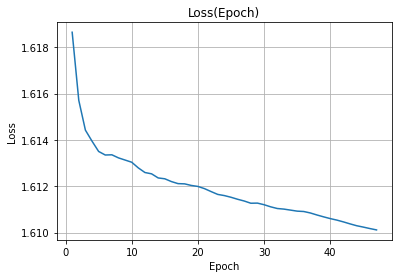

In [2]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bool_constr.csv').drop(columns='timestamps')
    y_max_u = y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)]
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data).detach().numpy().round().astype(bool)
    prediction = pd.DataFrame(prediction, columns=y_max_u_bool.columns)
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_classifier_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Sparse Dataset

[I 2022-09-05 13:20:14,160] A new study created in memory with name: no-name-7b581f79-acc4-4e4f-af39-0ef1441a24fd
[I 2022-09-05 13:22:14,718] Trial 0 finished with value: 0.5959920753768438 and parameters: {'hidden_size': 66, 'n_layers': 3, 'dropout': 0.34152692963360254, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.0035501312174389676, 'epochs': 55, 'batch_size': 64}. Best is trial 0 with value: 0.5959920753768438.
[I 2022-09-05 13:22:31,369] Trial 1 finished with value: 0.5959920753768438 and parameters: {'hidden_size': 18, 'n_layers': 1, 'dropout': 0.440758337861217, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 0.0022276722727476873, 'epochs': 5, 'batch_size': 16}. Best is trial 0 with value: 0.5959920753768438.
[I 2022-09-05 13:23:51,786] Trial 2 finished with value: 0.5959920753768438 and parameters: {'hidden_size': 10, 'n_layers': 1, 'dropout': 0.1583041920884033, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 1.1648074502058061e-05, 'epochs': 64, 'batch_size': 128}.

Number of finished trials:  100
Best trial:
  Value: 0.5959920753768438
  Params: 
    hidden_size: 66
    n_layers: 3
    dropout: 0.34152692963360254
    activation: relu
    optimizer: sgd
    lr: 0.0035501312174389676
    epochs: 55
    batch_size: 64


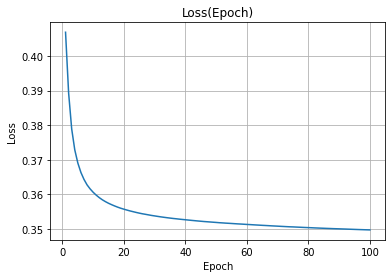

In [8]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns='timestamps')
    y_max_u = y_max_u[utils.cols_with_positive_values(y_max_u)]
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data).detach().numpy().astype(bool)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_max_u_train.loc[:, y_max_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_max_u.columns)
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.true_positives_rmse
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regressor_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Focused Dataset

In [ ]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bal_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_max_bal.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data).detach().numpy().astype(bool)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_max_u_train.loc[:, y_max_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_max_u.columns)
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.true_positives_rmse
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regressor_focused_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("value,{}\n".format(trial.value))